In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
import itertools
from python_problem_set import *

# Week 2

## What to turn in?

(1) a module file named  ```python_problem_set.py```, containing all the function definitions \*

(2) a Jupyter Note book file named ```python-problem-set.ipynb```, containing only the test cases and explanations.

(3) the pdf version of (2) ```python-problem-set.pdf```

<sub> \* In case you're wondering, python allows underscores but not hyphens in module names </sub>


### Attention:

- Your function names must be precisely the same as specified in the assignment notebook, and your functions must take arguments in the same order as specified

- If you wish, you can write your function definitions into the module directly, modifying the following steps appropriately

### Step 1, solve the problems in Jupyter Notebook

when the question is asking to write a function, please:

(1) write the function in one or more cells

(2) write at least one test case in another cell(s)

for example:

In [5]:
from python_problem_set import volume_of_cylinder

In [6]:
# this is a test case cell
volume_of_cylinder(2.5,3.0)

70.685775

### Step 2, copy all the function definitions to python_problem_set.py

create a module named python_problem_set.py

copy the function definitions in Step 1-(1) to this module

### Step 3, remove definitions in Jupyter Notebook, import the module

As a result of step 2,

you can now remove the function defination in your Jupyter Notebook.

But remember to import the function from the module

```python
from my_module import volume_of_cylinder
volume_of_cylinder(2.5,3.0)
```

In [7]:
volume_of_cylinder(2.5,3.0)

70.685775

## How to create a python module?

(1) write your .py module in a seperate file (within the same folder)

(2) import your module, and import your function here

(3) run your function in this jupyter notebook

## Problem Group 1 - Recursion

### Problem 1.1 - Factorial

In [8]:
print(recursive_factorial(5))
print(recursive_factorial(3))
print(recursive_factorial(0))

120
6
1


### Problem 1.2 - Memoization

In [9]:
# fib_memo = {}

# def F_memo(n):
#     if n == 1:
#         return 0
#     elif n == 2:
#         return 1
#     elif n not in fib_memo :
#         fib_memo[n] = F_memo(n - 1) + F_memo(n - 2)
#     return fib_memo[n]

# def F(n):
#     if n == 1:
#         return 0
#     elif n == 2:
#         return 1
#     else:
#         return F(n - 1) + F(n - 2)

In [10]:
%%timeit
F_memo(25)

35.5 ns ± 0.267 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [11]:
%%timeit
F(25)

3.15 ms ± 38 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
assert F(25) == F_memo(25)
print('passed')

passed


In [13]:
# def recursive_factorial_memo(n):
#     if n < 0:
#         raise Exception('n cannot be negative')
#     if n == 0:
#         return 1
#     elif n == 1:
#         return 1
#     elif n not in fac_memo :
#         fac_memo[n] = n * recursive_factorial_memo(n - 1)
#     return fac_memo[n]

In [14]:
%%timeit
recursive_factorial_memo(25)

38.3 ns ± 0.318 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [15]:
%%timeit
recursive_factorial(25)

809 ns ± 6.99 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [16]:
assert recursive_factorial_memo(25) == recursive_factorial(25)
print('passed')

passed


In both cases, we can notice a dramatic improvement of the runtime. This is because we are using dynamic programming approach to optimize the algorithm. In the non-dynamic approach, we are repeating the same operations many time. In the dynamic approach, we store the previously calcualted values in python dictionary thus we don't have to repeatedly calculate the subtree over and over. This speed increase will become more apparent as the argument gets larger. The speedup should scale exponentially.

### Problem 1.3 - Binomial Coefficients

In [17]:
# def binomial_factorial(n: int, k: int) -> int:
#     if n < 0 or k < 0:
#         raise Exception('n or k cannot be negative')
#     if k > n:
#         return 0
#         # raise exception here
#     return recursive_factorial(n)/(recursive_factorial(k)*recursive_factorial(n-k))

# def binomial_recursive(n : int, k : int) -> int:
#     if n < 0 or k < 0:
#         raise Exception('n or k cannot be negative')
#     if k > n:
#         raise Exception('k cannot be greater than n')
#     if k == 0:
#         return 1
#     if n == k:
#         return 1
#     else:
#         return binomial_recursive(n-1, k-1) + binomial_recursive(n-1, k)

In [18]:
test = True
for i in range(10):
    for j in range(0, i+1):
        if binomial_factorial(i, j) != binomial_recursive(i, j):
            test = False
print(test)

True


### Problem 1.4 - The Logistic Map

Your recursive function might be too slow to run

In that case, use the memoization method from problem 1.2 to accelerate it

In [19]:
# def logistic(n : int, r : float, x0 : float):
#     if n < 0:
#         raise Exception('n cannot be negative')
#     if n == 0:
#         return r*x0*(1-x0)
#     else:
#         term = logistic(n-1, r, x0)
#         return r*term*(1-term)

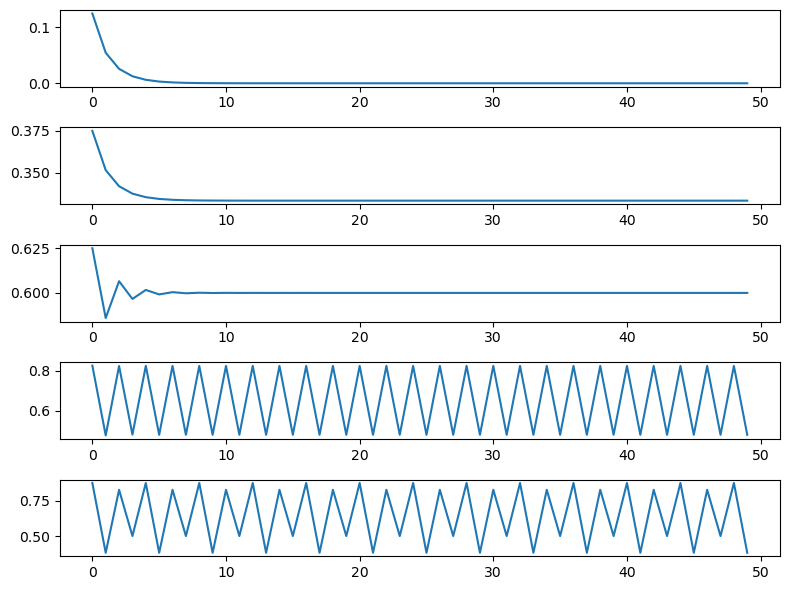

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=5, ncols=1, figsize = (8, 6))
x0 = 0.5
r_arr = [0.5, 1.5, 2.5, 3.3, 3.5]
n_arr = [i for i in range(50)]
y_arr = []
for i in range(len(r_arr)):
    for n in n_arr:
        y_arr.append(logistic(n, r_arr[i], x0))
    ax[i].plot(n_arr, y_arr)
    y_arr.clear()

plt.tight_layout()
plt.show()

As we can see, for the $r=0.5$ case, the logistic map converge to 0 quickly. For the $r=1.5$ case, the logistic map converge to a non-zero quickly. For the $r=2.5$ case, the logistic map bounces a little and then converge to 0.6 quickly. For the $r=3.3$ case, the logistic map bounces back and fourth between two values. For the $r=3.5$ case, the logistic map bounces back and fourth between two ranges, but not with two fixed values.

## Problem Group 2 - Searching for stuff


### Problem 2.1 - Linear Search


In [21]:
# def linear_search(L : list[int], n : int):
#     for i in range(len(L)):
#         if n == L[i]:
#             return i
#     print('The specific number is not in the list.')
#     return 

In [22]:
L = [3,4,7,9,10]
print(linear_search(L, 9))
print(linear_search(L, 13))

3
The specific number is not in the list.
None


### Problem 2.2 - Bisection(Binary) Search

In [23]:
# def bisection_search(L : list[int], n : int):
#     start = 0
#     end = len(L) -1
#     middle = 0
#     while (end-start+1) > 2:
#         middle = int((start + end)/2)
#         if L[middle] < n:
#             start = middle
#         else:
#             end = middle
#     if L[start] == n or L[end] == n:
#         return True
#     else:
#         return False

In [24]:
test_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

print("Testing elements in list:")
for i in range(1, 11):
    print(f"Searching for {i}: {'Pass' if bisection_search(test_list, i) else 'Fail'}")

print("Testing element not in list:")
print("Searching for 0:", "Pass" if not bisection_search(test_list, 0) else "Fail")
print("Searching for 11:", "Pass" if not bisection_search(test_list, 11) else "Fail")

small_test_list = [1, 2, 3]
print("Testing small list:")
print("Searching for 1:", "Pass" if bisection_search(small_test_list, 1) else "Fail")
print("Searching for 2:", "Pass" if bisection_search(small_test_list, 2) else "Fail")
print("Searching for 3:", "Pass" if bisection_search(small_test_list, 3) else "Fail")
print("Searching for 4:", "Pass" if not bisection_search(small_test_list, 4) else "Fail")

duplicate_test_list = [1, 2, 2, 2, 3]
print("Testing list with duplicates:")
print("Searching for 2:", "Pass" if bisection_search(duplicate_test_list, 2) else "Fail")
print("Searching for 3:", "Pass" if bisection_search(duplicate_test_list, 3) else "Fail")

Testing elements in list:
Searching for 1: Pass
Searching for 2: Pass
Searching for 3: Pass
Searching for 4: Pass
Searching for 5: Pass
Searching for 6: Pass
Searching for 7: Pass
Searching for 8: Pass
Searching for 9: Pass
Searching for 10: Pass
Testing element not in list:
Searching for 0: Pass
Searching for 11: Pass
Testing small list:
Searching for 1: Pass
Searching for 2: Pass
Searching for 3: Pass
Searching for 4: Pass
Testing list with duplicates:
Searching for 2: Pass
Searching for 3: Pass


### Problem 2.3 - Bisection Root Finding

In [25]:
# def bisection_root(f, x_left : float, x_right : float, epsilon : float):
#     while (x_right - x_left) / 2 > epsilon:
#         mid = (x_right + x_left)/2
        
#         if f(mid) == 0:
#             return mid
        
#         if f(x_left) * f(mid) < 0:
#             x_right = mid
#         else:
#             x_left = mid
    
#     return (x_left + x_right)/2

In [26]:
print(bisection_root((lambda x: x**2-9), 2, 5, 0.01))
print(bisection_root((lambda x: x**2-9), -4, -2, 0.01))
print(bisection_root((lambda x: x**2-4), 1, 3, 0.01))
print(bisection_root((lambda x: x**2-2), 0, 5, 0.01))

3.001953125
-3.0
2.0
1.416015625


### Problem 2.4 - A Physical Application: Projectile Range Maximization

#### (1)
use Markdown to write equation

$$x(t) = v\cos{(\theta)}t$$
$$y(t) = v\sin{(\theta)}t$$
$$z(t) = -\frac{1}{2}gt^2 = -x(t)\tan{\phi}$$
We can solve for `t` from `z(t)` as
$$t = \frac{2v\cos{\theta}\tan{\phi}}{g} $$
Plug `t` back into `x(t)`, we get
$$x_{f} = r = \frac{2v^2 \cos^2{\theta} \tan{\phi}}{g}$$

#### (2)

$$r = \frac{2v^2 \cos^2{\theta} \tan{\phi}}{g}$$
To find derivative and maximum $\phi$ and v,
$$\frac{dr}{dt} = 0$$
$$\frac{-4v^2 \tan{\phi} \cos{\theta} \sin{\theta}}{g} = 0$$
We see that the critical point is 0 when 
$$\cos{\theta} = 0 \text{ or } \sin{\theta} = 0$$
However, only the second case correspond to local maximum since if $\cos{\theta} = 0$, our range will be 0. Therefore, we conclude that $\theta = k\pi$ where k is an integer correspond to maximum range, since $\sin{\theta}$ will be 0 in those cases.

#### (3)
you should use the function in Problem 2.3 Bisection Root Finding  
But before that, you should know what is your function, which we are looking for the root.

In [27]:
v0 = 10 # assume initial speed is 10

# using bisection_root
phi_list = np.array([0, np.pi/8, np.pi/4, 3*np.pi/8])
phi = 0
def max_theta(theta):
    return -4*v0**2*np.tan(phi)*np.sin(theta)

def r(theta, phi, v = v0):
    return 2*v**2 * (np.cos(theta))**2 * np.tan(phi) / 9.8

theta = []
out = []
out_computational = []

for i in range(phi_list.size):
    phi = phi_list[i]
    theta.append(bisection_root(max_theta, -2, 2, 0.01))

for i in range(phi_list.size):
    out.append(r(theta[i], phi_list[i]))
    out_computational.append(r(0, phi_list[i]))


print('Theoratical range: ', out_computational)
print('Bisection range: ', out)

Theoratical range:  [0.0, 8.453338007614184, 20.40816326530612, 49.26966453822642]
Bisection range:  [0.0, 8.453338007614184, 20.40816326530612, 49.26966453822642]


## Problem Group 3 - Fun with primes

### Problem 3.1 - Sieve of Eratosthenes

In [28]:
# @njit
# def sieve_Eratosthenes(n : int) -> list[int]:
#     if n < 2:
#         raise Exception('n must be greater or equal to 2')
#     if n == 2:
#         return [2]
#     numbers = [i for i in range(n+1)]
#     isPrime = [True for i in range(n+1)]
#     prime = 2
#     while (prime**2 <= n):
#         if (isPrime[prime] == True):
#             for i in range(prime**2, n+1):
#                 if i % prime == 0:
#                     isPrime[i] = False
#         prime = prime + 1
    
#     delete = [0, 1]
#     numbers = np.array(numbers)
#     isPrime = np.array(isPrime)
#     return list(np.delete(numbers[isPrime], delete))

# def sieve_Eratosthenes_nonoptimized(n : int) -> list[int]:
#     if n < 2:
#         raise Exception('n must be greater or equal to 2')
#     if n == 2:
#         return [2]
#     numbers = [i for i in range(n+1)]
#     isPrime = [True for i in range(n+1)]
#     prime = 2
#     while (prime**2 <= n):
#         if (isPrime[prime] == True):
#             for i in range(prime**2, n+1):
#                 if i % prime == 0:
#                     isPrime[i] = False
#         prime = prime + 1
    
#     delete = [0, 1]
#     numbers = np.array(numbers)
#     isPrime = np.array(isPrime)
#     return list(np.delete(numbers[isPrime], delete))

In [29]:
print(sieve_Eratosthenes(2))
print(sieve_Eratosthenes(11))
print(sieve_Eratosthenes(53))

[2]
[2, 3, 5, 7, 11]
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53]


### Problem 3.2 - Prime Factorization

In [30]:
# def prime_factors(n : int) -> list[int]:
#     if n < 2:
#         raise Exception('n should be greater or equal than 2')
#     prime_list = sieve_Eratosthenes(n)
#     out = []
#     prime_index = 0
#     while n >= 2:
#         if n % prime_list[prime_index] == 0:
#             out.append(prime_list[prime_index])
#             n = n / prime_list[prime_index]
#         else:
#             prime_index = prime_index + 1
#     return out

In [31]:
print(prime_factors(2))
print(prime_factors(3))
print(prime_factors(4))
print(prime_factors(20))
print(prime_factors(49))
print(prime_factors(63))
print(prime_factors(250))

[2]
[3]
[2, 2]
[2, 2, 5]
[7, 7]
[3, 3, 7]
[2, 5, 5, 5]


### Problem 3.3 - $n^{th}$ prime

In [32]:
# @njit
# def nth_prime(n : int) -> int:
#     if n < 1:
#         raise Exception('input cannot be less than 1')
#     elif n == 1:
#         return 2
#     elif n == 2:
#         return 3
    
#     guess_N = int(n * (np.log(n) + np.log(np.log(n))))
#     prime_list = sieve_Eratosthenes(guess_N)
#     while len(prime_list) < n:
#         guess_N = guess_N * 2
#         prime_list = sieve_Eratosthenes(guess_N)
#     return prime_list[n-1]

# def nth_prime_non_optimized(n : int) -> int:
#     if n < 1:
#         raise Exception('input cannot be less than 1')
#     elif n == 1:
#         return 2
#     elif n == 2:
#         return 3
    
#     guess_N = int(n * (np.log(n) + np.log(np.log(n))))
#     prime_list = sieve_Eratosthenes_nonoptimized(guess_N)
#     while len(prime_list) < n:
#         guess_N = guess_N * 2
#         prime_list = sieve_Eratosthenes_nonoptimized(guess_N)
#     return prime_list[n-1]

In [33]:
%%timeit
nth_prime(5)
nth_prime(100000)

266 ms ± 2.33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
%%timeit
nth_prime_non_optimized(5)
nth_prime_non_optimized(100000)

3.13 s ± 23.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [35]:
assert nth_prime(3) == 5
assert nth_prime(4) == 7
assert nth_prime(5) == 11
assert nth_prime(10) == 29
assert nth_prime(100) == 541
assert nth_prime(10001) == 104743
assert nth_prime(10) == nth_prime_non_optimized(10)
print("All tests passed!")

All tests passed!


### Problem 4 - Twelve sided dice


In [56]:
from math import factorial

def count_occurence(dice_combo):
    # count the occurence of each entry in the configuration
    occurence = {}
    for dice_value in dice_combo:
        if dice_value in occurence:
            occurence[dice_value] = occurence[dice_value] + 1
        else:
            occurence[dice_value] = 1
    return occurence

def count_combination(dice_side, total_dice_num, dice_combo):
    # check if the combo list is valid
    for dice in dice_combo:
        if dice > dice_side:
            raise Exception('Dice input larger than maximum side')
        elif dice < 0:
            raise Exception('Dice input lower than minumum side')

    # use multinomial coefficient formula to calculate the combination
    occurence = count_occurence(dice_combo)
    denominator = 1
    numerator = factorial(total_dice_num)

    for key, value in occurence.items():
        denominator = denominator * factorial(value)

    return numerator // denominator

# main recursion function
def top_sum(dice_side: int, top_num : int, total_dice_num : int, target_sum : int, dice_combo : list) -> int:
    # discard the invalid configuration
    if len(dice_combo) == top_num and sum(dice_combo) != target_sum:
        return 0
    # count the number of combinations from configuration
    if len(dice_combo) == total_dice_num:
        return count_combination(dice_side, total_dice_num, dice_combo)
    
    if len(dice_combo) == 0:
        next_dice = dice_side
    else:
        next_dice = dice_combo[-1]

    # use dp to do recursion for all possibilities
    # essentially we are trying all possibilities by adding one dice at a time
    # suppose the first time we are adding the first element, then the next recursion line
    # we are adding the second allowed item specified by the next_dice range so that we are
    # not exceeding the maximum
    # then our base case will use count_combination() to calcuate the number of combinations
    # of the successful combinations
    out = 0
    for dice in range(1, next_dice + 1):
        dice_combo.append(dice)
        out = out + top_sum(dice_side, top_num, total_dice_num, target_sum, dice_combo)
        dice_combo.pop()
    return out

print(top_sum(6, 2, 2, 6, []))
print(top_sum(6, 2, 3, 3, []))
print(top_sum(6, 3, 5, 15, []))

5
3
1111
